In [1]:
#Assignment module 6 Simple linear regression Year_exp data 

# lets import files Salary and calories 
sal <- read.csv(file.choose())

In [9]:
sal[0:10,]

,Year_exp,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


 ########################################### DATA pre processing #############################################################

In [4]:
# structure of data frame , it is the data relating to yearofExperience  and salaries 
str(sal) # data type is integer 
attach(sal)
summary(sal)


'data.frame':	30 obs. of  2 variables:
 $ YearsExperience: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary         : num  39343 46205 37731 43525 39891 ...


 YearsExperience      Salary      
 Min.   : 1.100   Min.   : 37731  
 1st Qu.: 3.200   1st Qu.: 56721  
 Median : 4.700   Median : 65237  
 Mean   : 5.313   Mean   : 76003  
 3rd Qu.: 7.700   3rd Qu.:100545  
 Max.   :10.500   Max.   :122391  

In [6]:
colnames(sal) # Viewing and checking column names 

[1] "YearsExperience" "Salary"

In [11]:
# Rename column where names is "Sepal.Length"
names(sal)[names(sal) == 'YearsExperience'] <- "Year_exp" # renaming column name for convinience
names(sal)[names(sal) == 'Salary'] <- "Salary"
sal[0:10,]
attach(sal) # afte changing attaching value

,Year_exp,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


The following objects are masked from sal (pos = 3):

    Salary, Year_exp


The following object is masked from sal (pos = 4):

    Salary




In [8]:
Salary # fine its working 
Year_exp # fine its working 

[1]  39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
[11]  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
[21]  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872

[1]  1.1  1.3  1.5  2.0  2.2  2.9  3.0  3.2  3.2  3.7  3.9  4.0  4.0  4.1  4.5
[16]  4.9  5.1  5.3  5.9  6.0  6.8  7.1  7.9  8.2  8.7  9.0  9.5  9.6 10.3 10.5

[1] 0.3361619

[1] 0.3603123

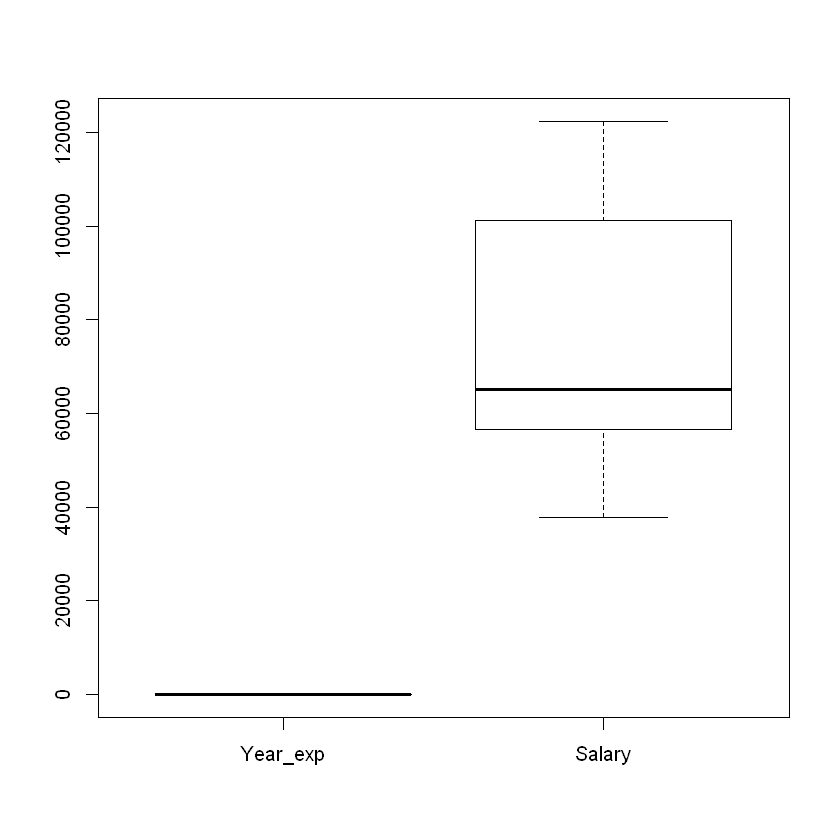

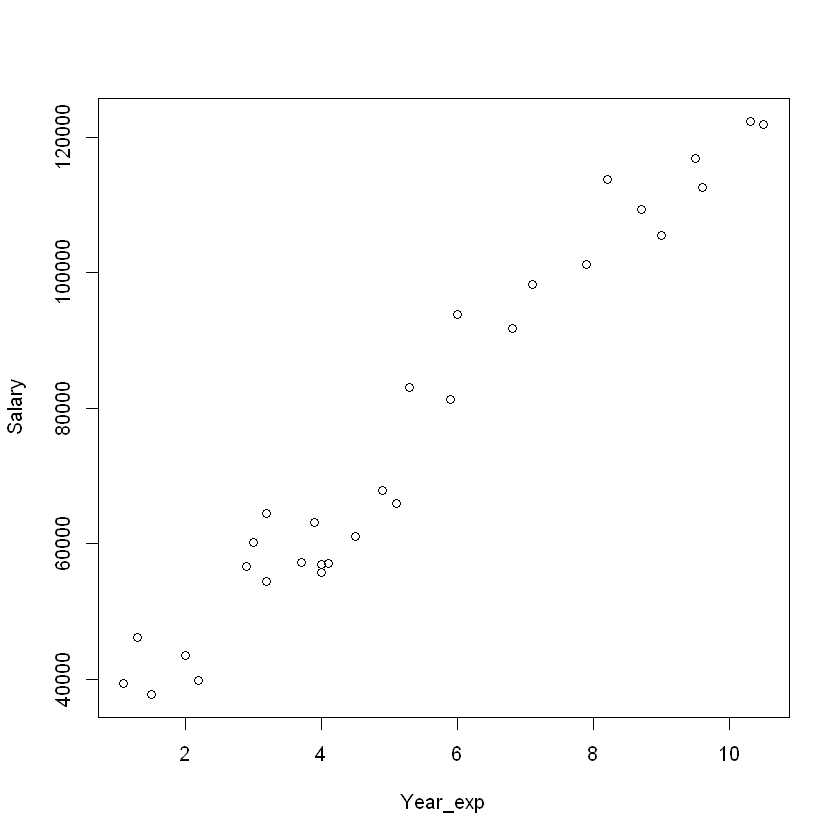

In [13]:
# priliminary investigation for outliers 
boxplot(sal)
# as there is no outliers we can see 
library(moments) # both aer positive skewness 
skewness(Salary)
skewness(Year_exp)

plot(Year_exp,Salary)

In [14]:
# Pre porcessing data checking for NA values 
dim(sal)
str(sal)  # data frame 
sum(is.na(sal)==T) # as there is no NA value if 0 there is no na value exist

mean(Salary) # checking if perfectly mean is coming or not 
mean(Year_exp) # mean is proof there is no NA value

[1] 30  2

'data.frame':	30 obs. of  2 variables:
 $ Year_exp: num  1.1 1.3 1.5 2 2.2 2.9 3 3.2 3.2 3.7 ...
 $ Salary  : num  39343 46205 37731 43525 39891 ...


[1] 0

[1] 76003

[1] 5.313333

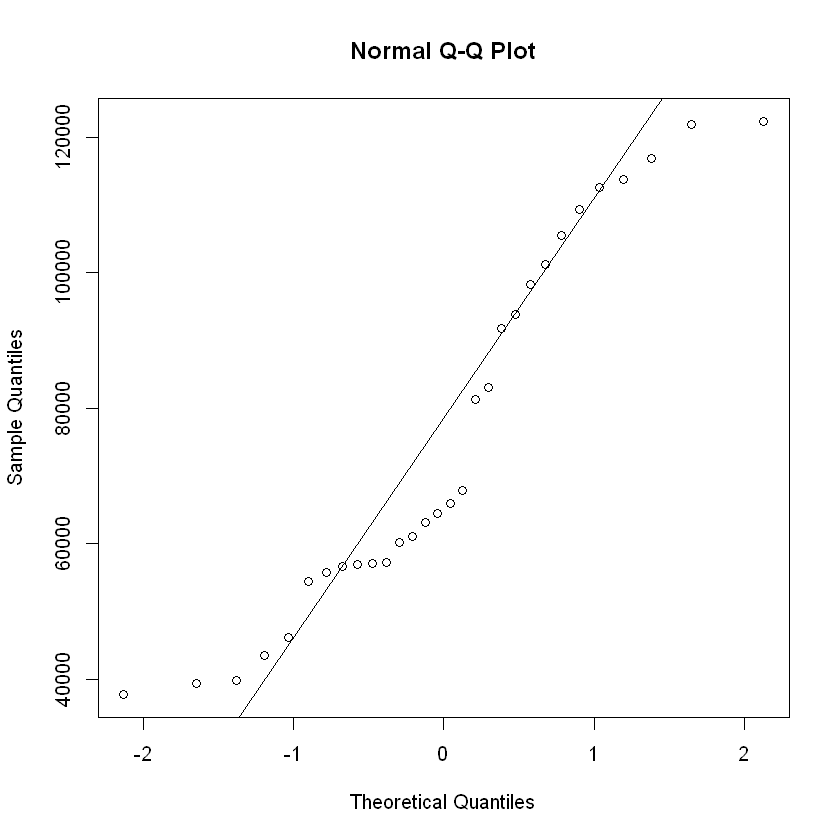

[1] 0.9782416

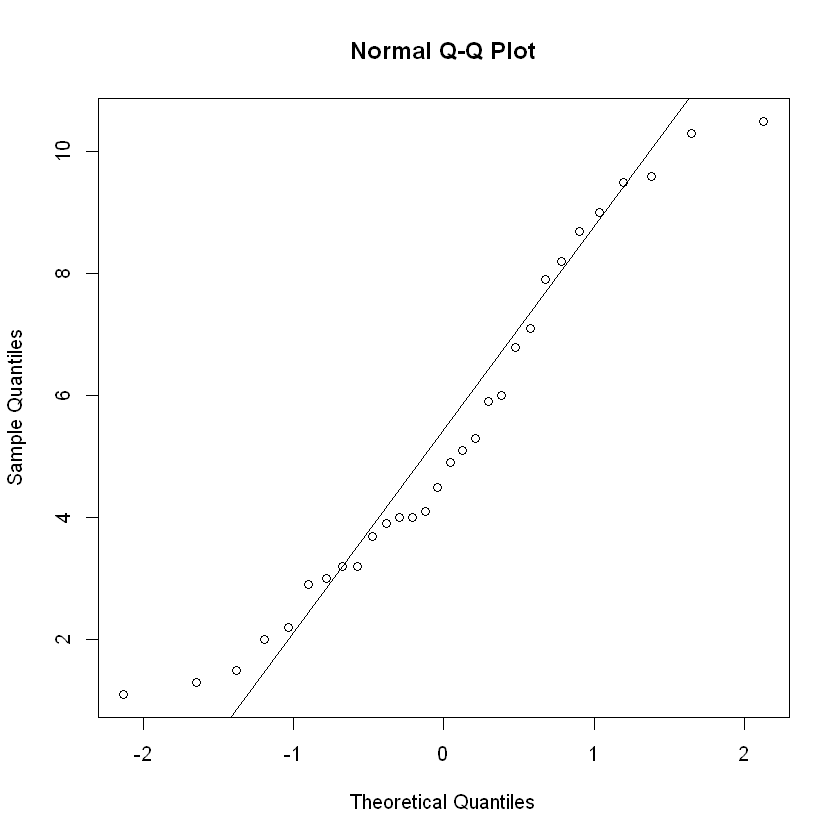

In [15]:
# Just checking how normally data is distributed
qqnorm(Salary)
qqline(Salary)
qqnorm(Year_exp)
qqline(Year_exp)
cor(Salary,Year_exp) # correlation is0.97824161848876

In [16]:
#sample split data into train test 50:50 ratio as dat ais less
library(ISLR)
attach(sal)
smp_siz = floor(0.50*nrow(sal))  # creates a value for dividing the data into train and test. In this case the value is defined as 75% of the number of rows in the dataset
smp_siz  # shows the value of the sample size

The following objects are masked from sal (pos = 5):

    Salary, Year_exp


The following objects are masked from sal (pos = 6):

    Salary, Year_exp


The following object is masked from sal (pos = 7):

    Salary




[1] 15

In [17]:
set.seed(123)   # set seed to ensure you always have same random numbers generated
train_ind = sample(seq_len(nrow(sal)),size = smp_siz)  # Randomly identifies therows equal to sample size ( defined in previous instruction) from  all the rows of Smarket dataset and stores the row number in train_ind
train =sal[train_ind,] #creates the training dataset with row numbers stored in train_ind
test=sal[-train_ind,]  # creates the test dataset excluding the row numbers mentioned in train_ind

In [18]:
test

train

,Year_exp,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
4,2.0,43525
6,2.9,56642
7,3.0,60150
12,4.0,55794
13,4.0,56957
16,4.9,67938
17,5.1,66029


,Year_exp,Salary
,<dbl>,<dbl>
15,4.5,61111
19,5.9,81363
14,4.1,57081
3,1.5,37731
10,3.7,57189
18,5.3,83088
22,7.1,98273
11,3.9,63218
5,2.2,39891


[1] 5592.044

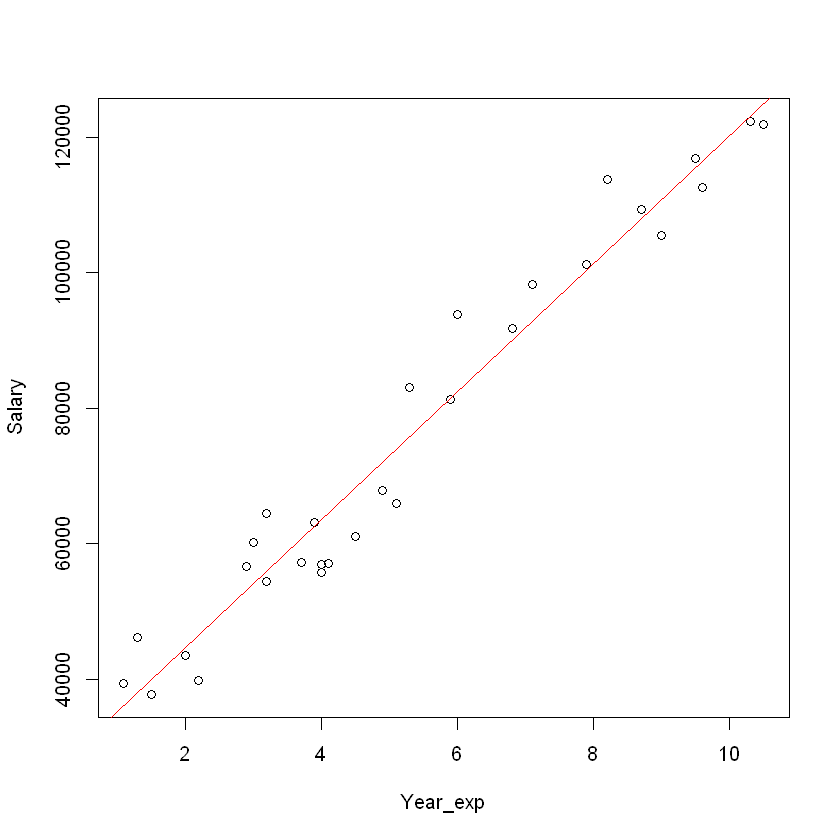

In [19]:
# we trying to fit a linear regression line  by plotting linear mosal 
lm <- lm(Salary~Year_exp,data=sal) # linear mosal
rmse <- sqrt(mean(lm$residuals^2))
rmse # rmse is too high value 
plot( Year_exp,Salary) # scatter plot X is Waist and y is AT
abline(lm(Salary~Year_exp,data = sal),col = 'red') # made a regression line 

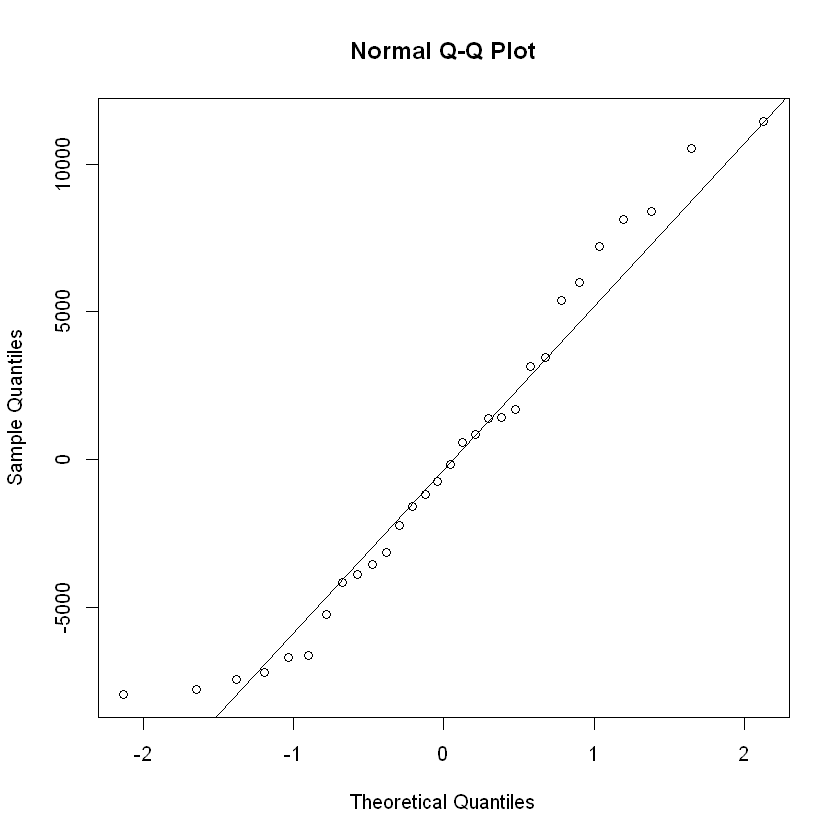

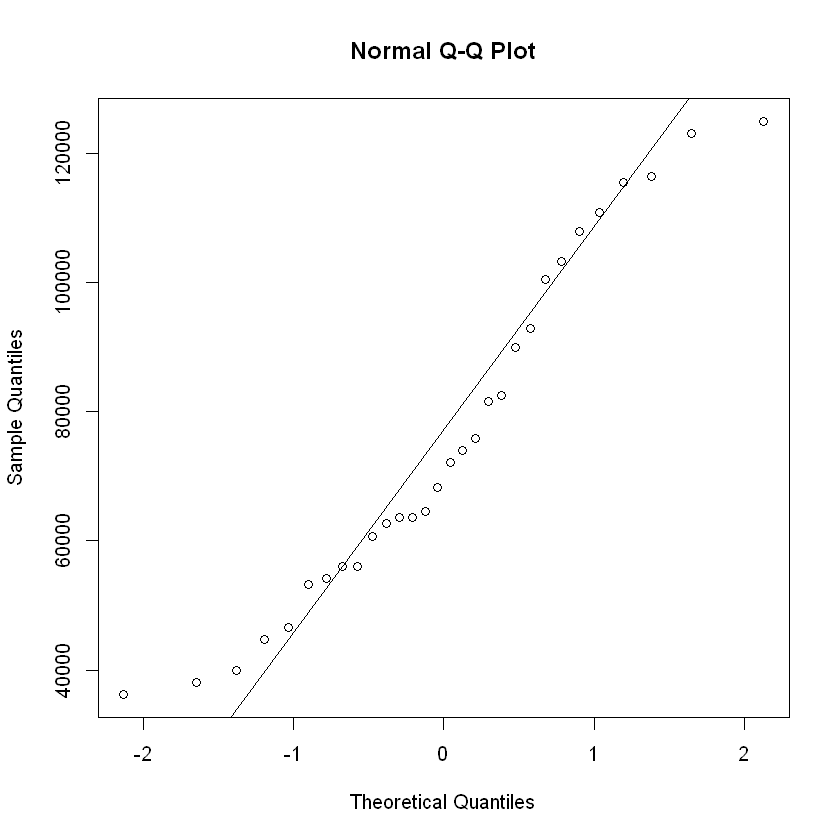

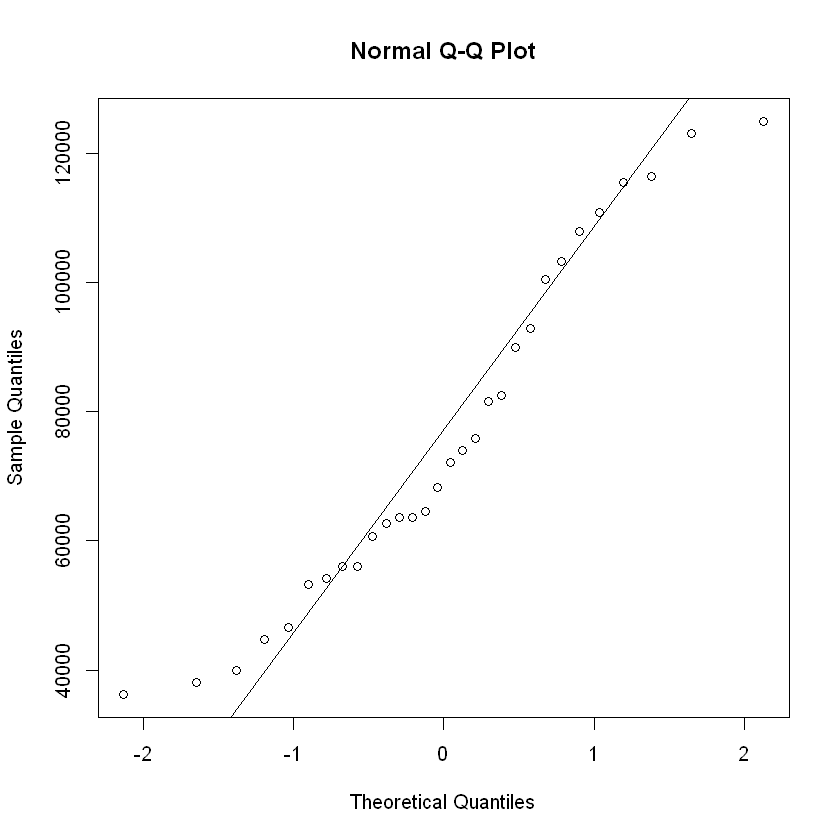

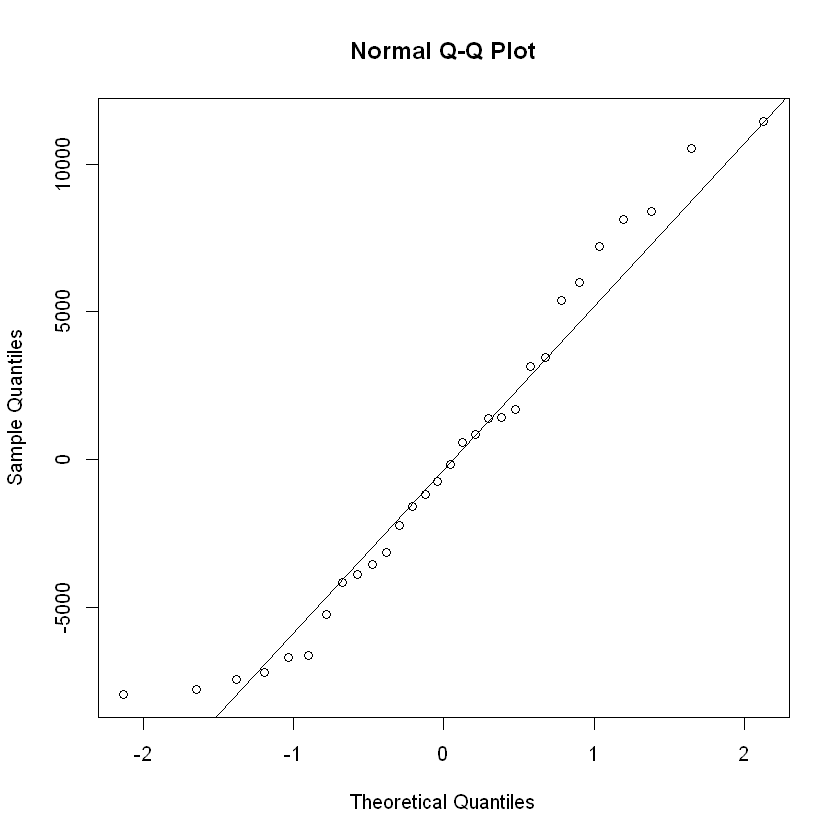

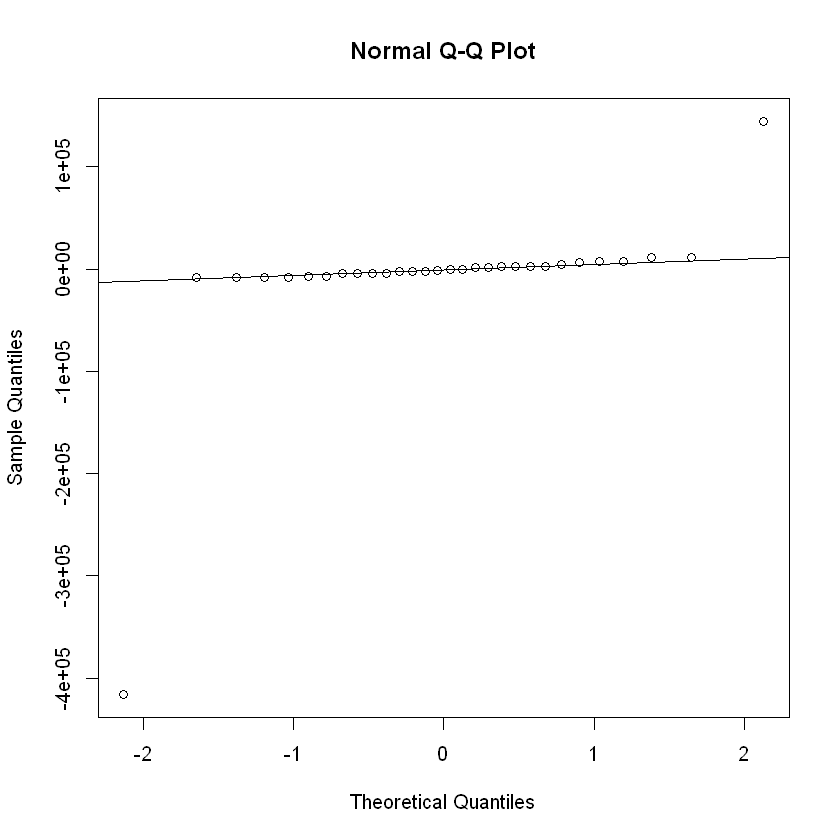

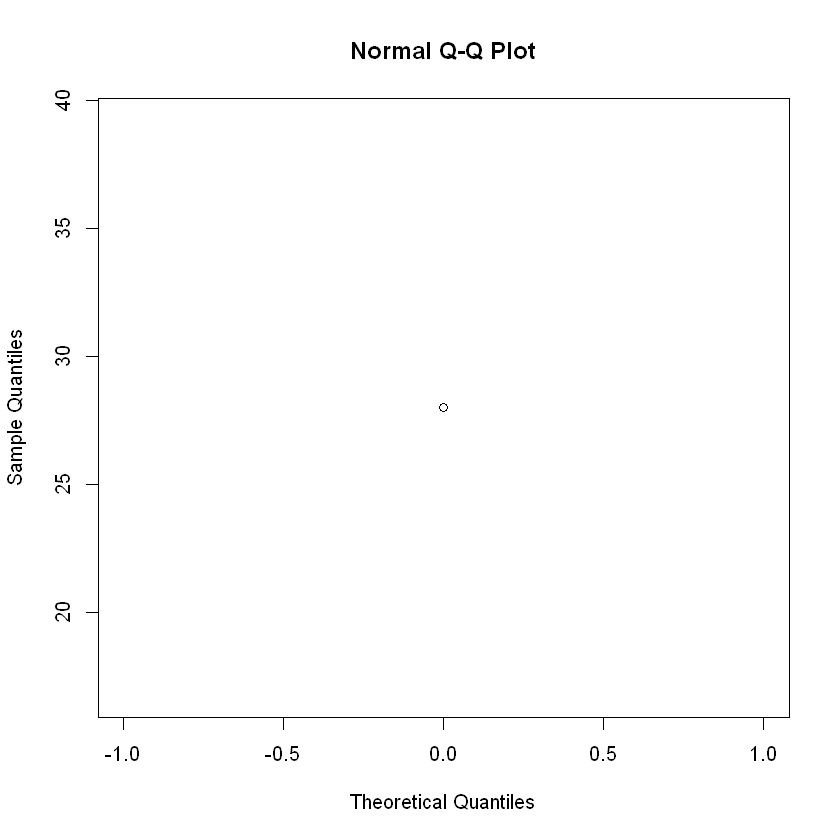

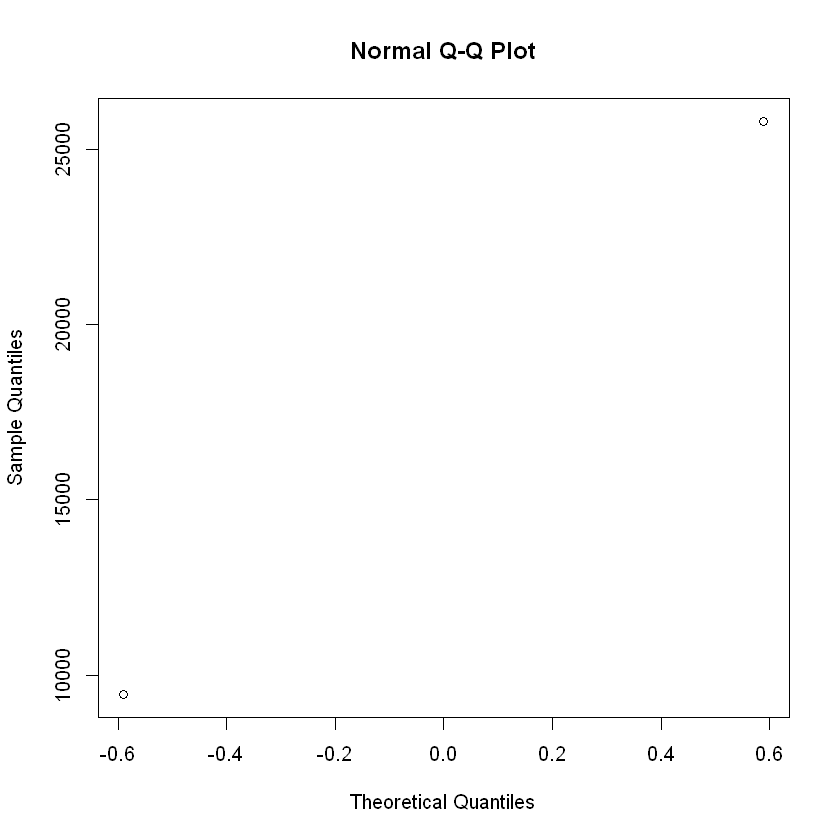

In [20]:
# Dignosis of mosal in qqnorm mothod

qqnorm(resid(lm))# checking linearity residuals of linear mosal
qqline(resid(lm)) # trying to fitting a line on the mosal made
qqnorm(fitted(lm)) # checking fittled 
qqline(fitted(lm)) # linear mosal fitting line
qqnorm(fitted.values(lm))# checking fitted values
qqline(fitted.values(lm))# checking fitted values
qqnorm(residuals(lm))# checking residials 
qqline(residuals(lm))# fitting line on residuals
qqnorm(effects(lm)) # effects of lm in quantiles
qqline(effects(lm)) # fitting line on effects
qqnorm(df.residual(lm)) # checking digree of freedom
qqnorm(coefficients(lm))# checking cofficnent point on lm. 

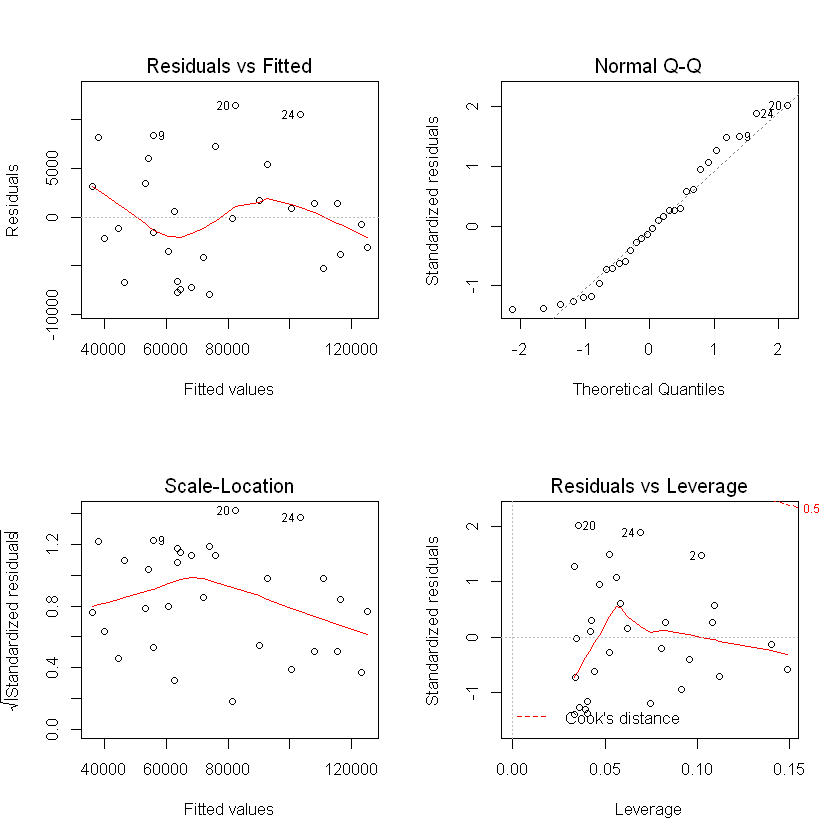

In [21]:
# dignostic plot togeather all need to increase size 
par(mfrow = c(2, 2))
plot(lm)

Potentially influential observations of
	 lm(formula = Salary ~ Year_exp, data = sal) :

   dfb.1_ dfb.Yr_x dffit cov.r   cook.d hat  
29  0.03  -0.05    -0.05  1.25_*  0.00   0.14
30  0.14  -0.21    -0.24  1.23_*  0.03   0.15


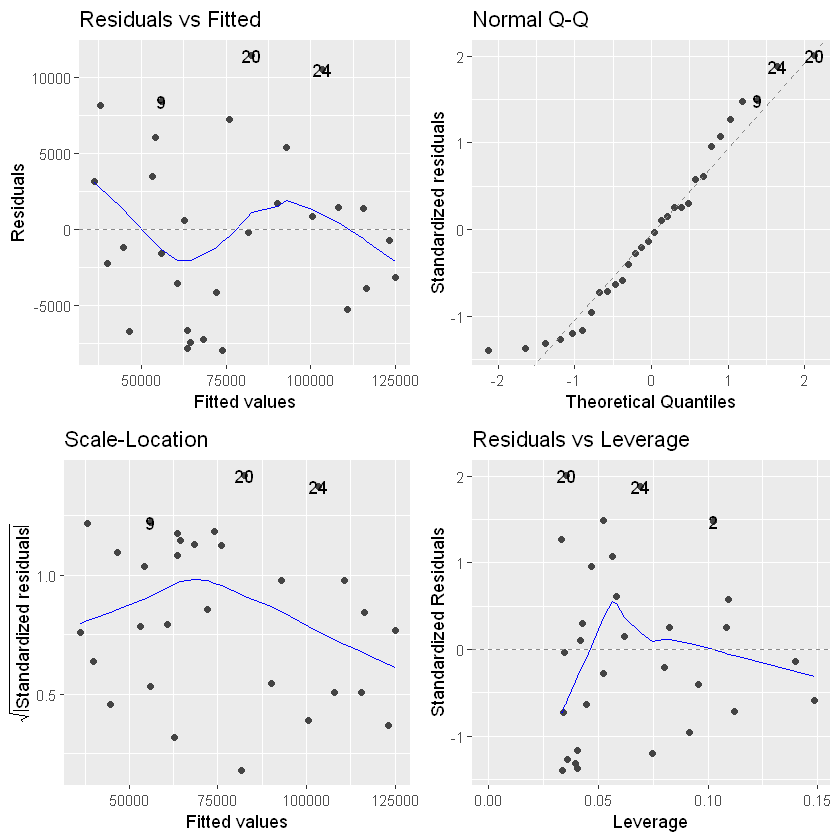

In [27]:
#dignostic plot togeather with outliers with autopilot
#install.packages("ggfortify")
# second method of dignostic plot ggplot 2 
library("ggplot2")
library("tidyverse")
library("modelr")
library("broom")
library("ggfortify")
autoplot(lm)
summary(influence.measures(lm)) # we can have influence measure of cookr and hat value


Call:
lm(formula = Salary ~ Year_exp, data = sal)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25792.2     2273.1   11.35 5.51e-12 ***
Year_exp      9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


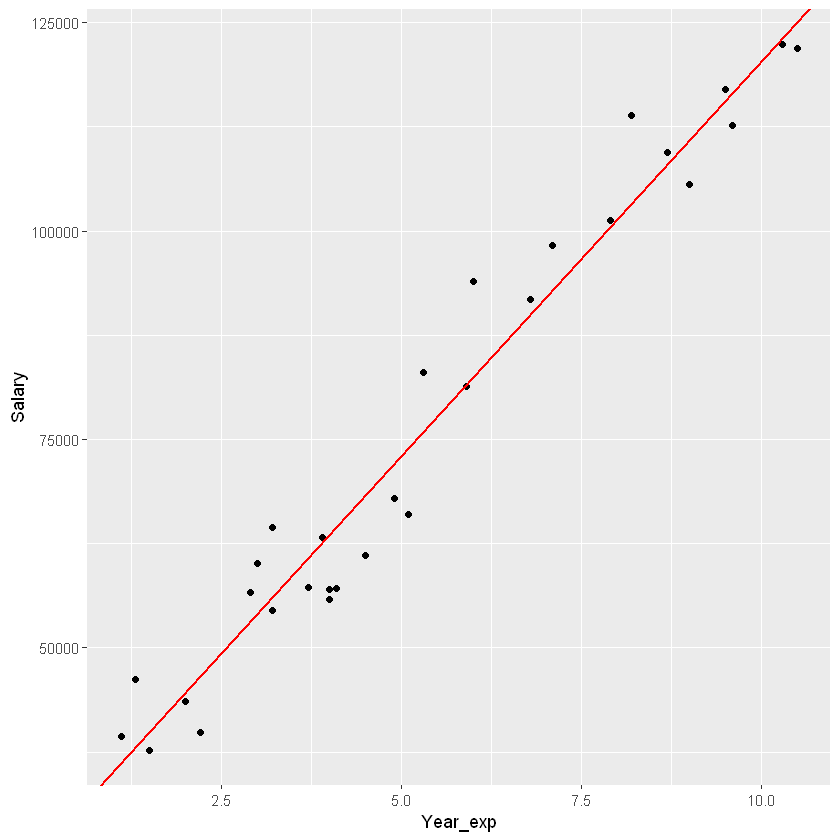

In [30]:
# adding regression line with ggplot2 A scattar plot 
ggplot(sal,aes(x=Year_exp,y=Salary)) +geom_point()+geom_abline(intercept =  25792.2  ,slope =  9450.0  ,color ='red',size =.65 )# visualizsing geoom point 

summary(lm)


In [31]:
#normality test
shapiro.test(Salary) # weight is not normal 
shapiro.test(Year_exp) # salories follows normal pattern


	Shapiro-Wilk normality test

data:  Salary
W = 0.91032, p-value = 0.01516



	Shapiro-Wilk normality test

data:  Year_exp
W = 0.94206, p-value = 0.1034


[1] 5592.044


Call:
lm(formula = Salary ~ Year_exp, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8354.6 -4073.0  -738.6  4650.4  9966.3 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22280.5     3838.1   5.805 6.12e-05 ***
Year_exp     10282.2      669.8  15.350 1.04e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6281 on 13 degrees of freedom
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9437 
F-statistic: 235.6 on 1 and 13 DF,  p-value: 1.038e-09


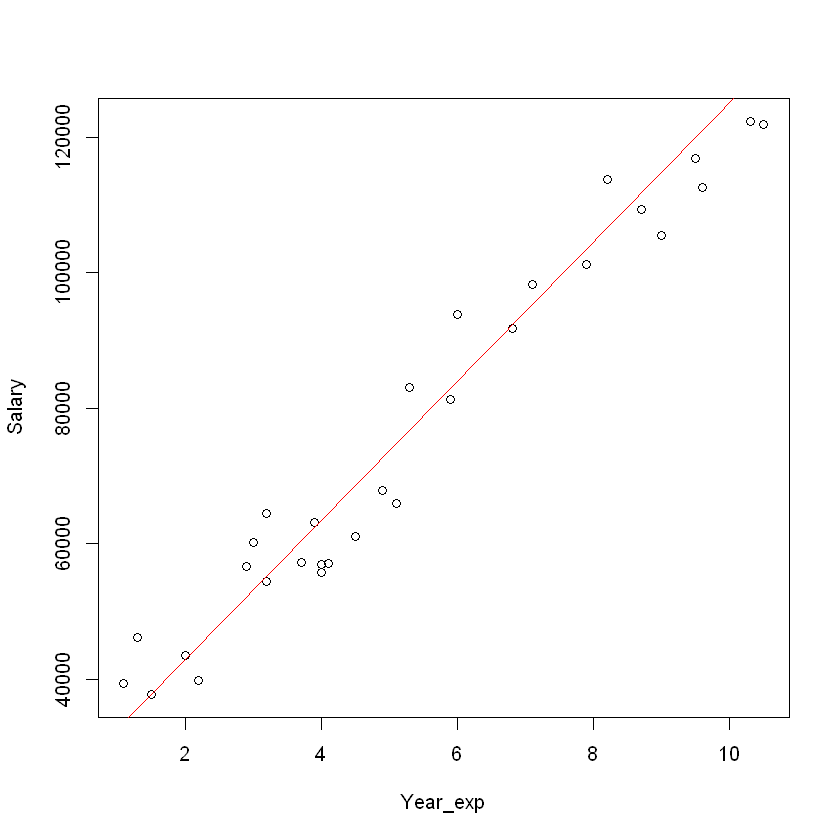

In [32]:
# lets make a linear mosal With training data set and test it 
# we trying to fit a linear regression line  by plotting linear mosal 
lm_train <- lm(Salary~Year_exp,data=train) # linear mosal
rmse_train <- sqrt(mean(lm$residuals^2))
rmse_train # priliminary mosal gives rmse 32 which is error is higher 
plot(Year_exp, Salary) # scatter plot X is Waist and y is AT
abline(lm(Salary~Year_exp,data = train),col = 'red') # made a regression line 
summary(lm_train)

In [4]:
Y = 22280.5 + 10282.2 *4
Y

[1] 63409.3

In [33]:
confint(lm_train,level=0.95)
lm_res  <-  predict(lm_train, interval = "confidence")
lm_res
lm_ex_ploy  <- exp(lm_res)
lm_ex_ploy
err_ploy  <- lm_ex_ploy-Salary
err_ploy
rmse  <- sqrt(mean(err_ploy^2))
rmse
residual  <-  lm_train$residuals
residual

,2.5 %,97.5 %
(Intercept),13988.770,30572.26
Year_exp,8835.117,11729.28


,fit,lwr,upr
15,68550.41,64905.99,72194.83
19,82945.49,79295.70,86595.27
14,64437.53,60593.27,68281.79
3,37703.81,31313.24,44094.39
10,60324.65,56208.22,64441.08
18,76776.17,73269.17,80283.16
22,95284.12,90824.55,99743.70
11,62381.09,58408.95,66353.23
5,44901.35,39330.18,50472.52
20,83973.71,80280.77,87666.65


,fit,lwr,upr
15,Inf,Inf,Inf
19,Inf,Inf,Inf
14,Inf,Inf,Inf
3,Inf,Inf,Inf
10,Inf,Inf,Inf
18,Inf,Inf,Inf
22,Inf,Inf,Inf
11,Inf,Inf,Inf
5,Inf,Inf,Inf
20,Inf,Inf,Inf


Warning message in lm_ex_ploy - Salary:
"longer object length is not a multiple of shorter object length"


,fit,lwr,upr
15,Inf,Inf,Inf
19,Inf,Inf,Inf
14,Inf,Inf,Inf
3,Inf,Inf,Inf
10,Inf,Inf,Inf
18,Inf,Inf,Inf
22,Inf,Inf,Inf
11,Inf,Inf,Inf
5,Inf,Inf,Inf
20,Inf,Inf,Inf


[1] Inf

15          19          14           3          10          18 
-7439.40919 -1582.48678 -7356.52988    27.18565 -3135.65057  6311.83218 
         22          11           5          20          28          24 
 2988.87528   836.90978 -5010.35315  9966.29339 -8354.62042  7217.45717 
          9          27           8 
 9261.44857 -2992.40059  -738.55143

1         2         4         6         7        12        13        16 
 33590.94  35647.37  42844.91  52098.89  53127.11  63409.31  63409.31  72663.29 
       17        21        23        25        26        29        30 
 74719.73  92199.47 103509.88 111735.64 114820.30 128187.16 130243.60

1         2         4         6         7        12        13        16 
 33590.94  35647.37  42844.91  52098.89  53127.11  63409.31  63409.31  72663.29 
       17        21        23        25        26        29        30 
 74719.73  92199.47 103509.88 111735.64 114820.30 128187.16 130243.60

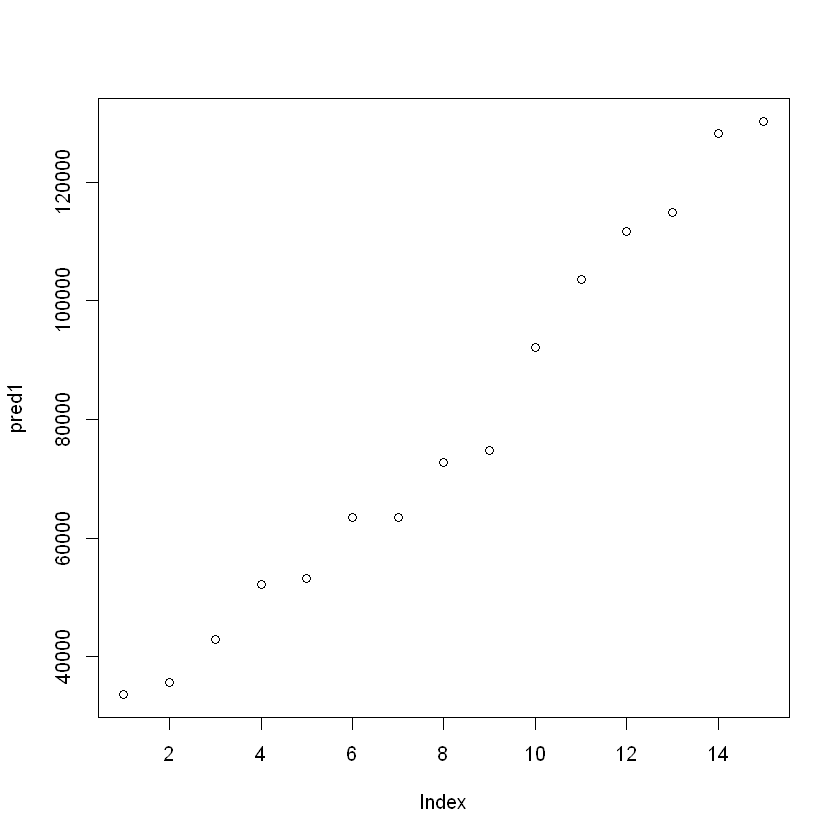

In [34]:
pred1  <- predict(lm_train,test) # prediction points and visualizaton below
pred1

plot(pred1) # our prediction is working lets validate it 
# lets check 10 value of pred
pred  <- predict(lm_train,test) # predicting 10 values 
pred # after prediction we are checking 10 values 

In [35]:
# K-10 Fold valdation mosal is ready
library(lattice)
library(caret) 

# Fit linear regression mosal
Kfoldmosal <- train(Salary ~ Year_exp, sal,
                    method = "lm",
                    trControl = trainControl(
                      method = "cv", number = 10,
                      verboseIter = TRUE
                    )
) 

predicted <- predict(Kfoldmosal,sal[0:10,]) 
predicted
sal[0:10,]#he row predicted it worked AT is predicted 
#Evaluate error
actual <- sal[0:10, "Salary"]
err <-  sqrt(mean((predicted - actual)^2)) 
err

 #print the mosal
Kfoldmosal

summary(Kfoldmosal) # p value is too low so we rejecting this mosal


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift




+ Fold01: intercept=TRUE 
- Fold01: intercept=TRUE 
+ Fold02: intercept=TRUE 
- Fold02: intercept=TRUE 
+ Fold03: intercept=TRUE 
- Fold03: intercept=TRUE 
+ Fold04: intercept=TRUE 
- Fold04: intercept=TRUE 
+ Fold05: intercept=TRUE 
- Fold05: intercept=TRUE 
+ Fold06: intercept=TRUE 
- Fold06: intercept=TRUE 
+ Fold07: intercept=TRUE 
- Fold07: intercept=TRUE 
+ Fold08: intercept=TRUE 
- Fold08: intercept=TRUE 
+ Fold09: intercept=TRUE 
- Fold09: intercept=TRUE 
+ Fold10: intercept=TRUE 
- Fold10: intercept=TRUE 
Aggregating results
Fitting final model on full training set


1        2        3        4        5        6        7        8 
36187.16 38077.15 39967.14 44692.12 46582.12 53197.09 54142.09 56032.08 
       9       10 
56032.08 60757.06

,Year_exp,Salary
,<dbl>,<dbl>
1,1.1,39343
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.9,56642
7,3.0,60150
8,3.2,54445
9,3.2,64445


[1] 5110.229

Linear Regression 

30 samples
 1 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 26, 26, 28, 28, 28, 27, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  5782.132  0.9750127  5068.726

Tuning parameter 'intercept' was held constant at a value of TRUE


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25792.2     2273.1   11.35 5.51e-12 ***
Year_exp      9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


In [36]:
pred_train  <- predict(Kfoldmosal,train)
pred_train # the predicted values of train data 

pred_test  <- predict(Kfoldmosal,test)
pred_test # the predicted values of test data 



15        19        14         3        10        18        22        11 
 68317.03  81546.98  64537.05  39967.14  60757.06  75877.00  92886.93  62647.05 
        5        20        28        24         9        27         8 
 46582.12  82491.97 116511.84 103281.89  56032.08 115566.84  56032.08

1         2         4         6         7        12        13        16 
 36187.16  38077.15  44692.12  53197.09  54142.09  63592.05  63592.05  72097.02 
       17        21        23        25        26        29        30 
 73987.01  90051.94 100446.90 108006.87 110841.86 123126.81 125016.80

[1] 0.9782416


Call:
lm(formula = Salary ~ Year_exp)

Residuals:
    Min      1Q  Median      3Q     Max 
-7958.0 -4088.5  -459.9  3372.6 11448.0 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  25792.2     2273.1   11.35 5.51e-12 ***
Year_exp      9450.0      378.8   24.95  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5788 on 28 degrees of freedom
Multiple R-squared:  0.957,	Adjusted R-squared:  0.9554 
F-statistic: 622.5 on 1 and 28 DF,  p-value: < 2.2e-16


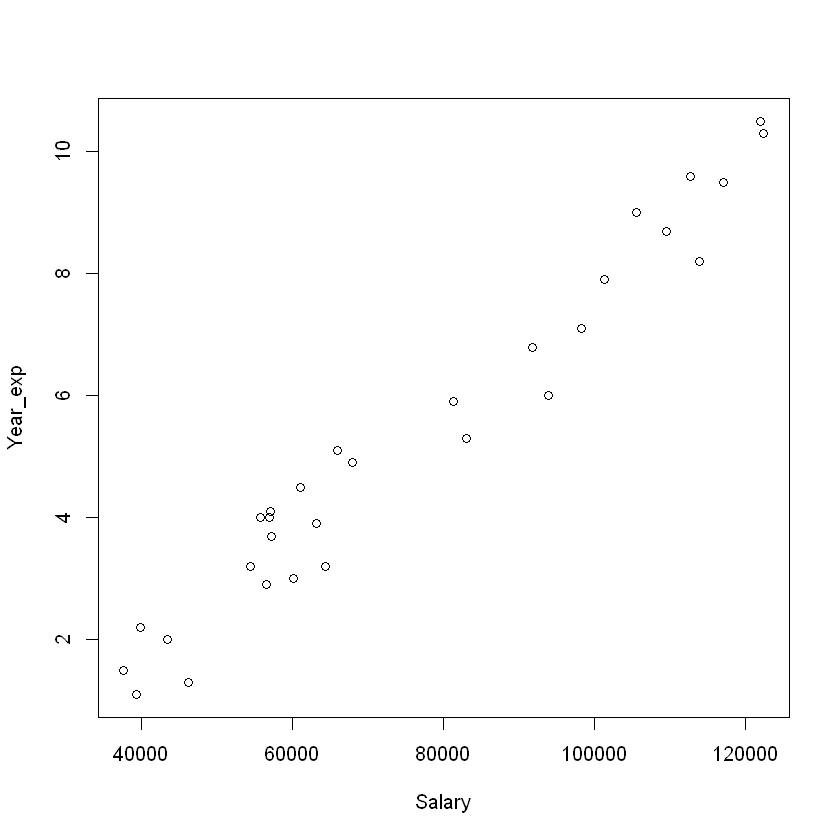

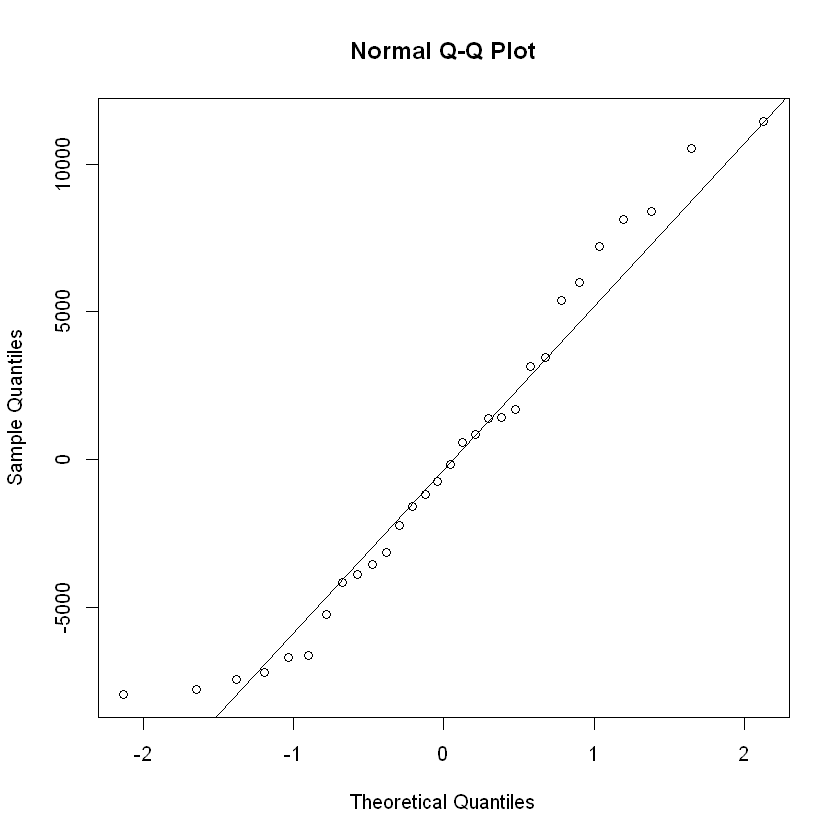

[1] 5592.044

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5592    5592    5592    5592    5592    5592 

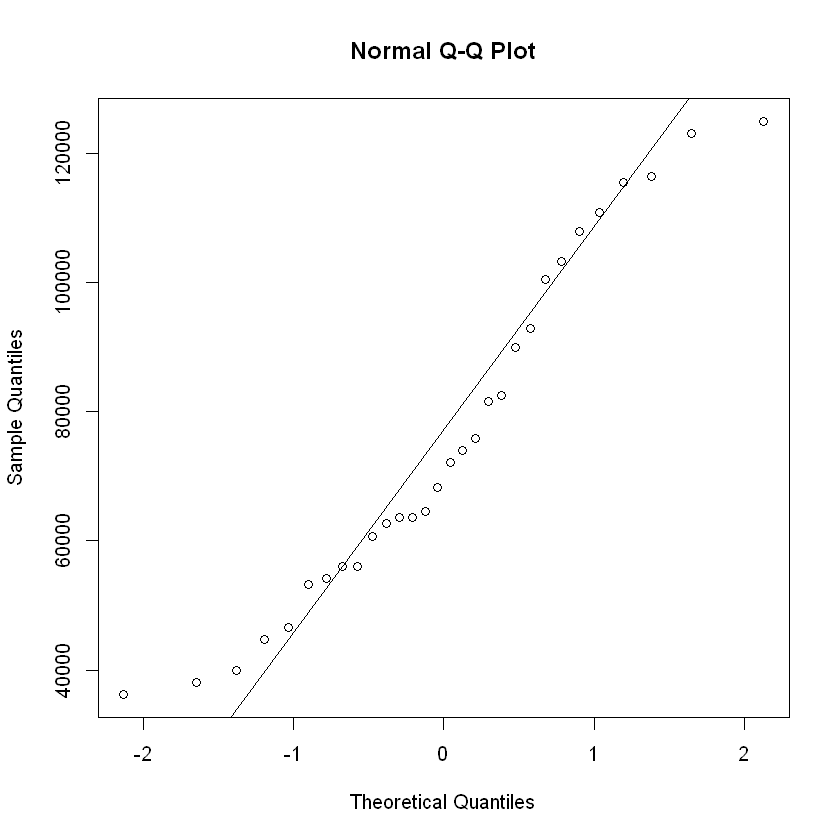

[1] 0.9653844


Call:
lm(formula = log(Salary) ~ Year_exp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18949 -0.06946 -0.01068  0.06932  0.19029 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.507402   0.038443  273.33   <2e-16 ***
Year_exp     0.125453   0.006406   19.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09789 on 28 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9295 
F-statistic: 383.6 on 1 and 28 DF,  p-value: < 2.2e-16


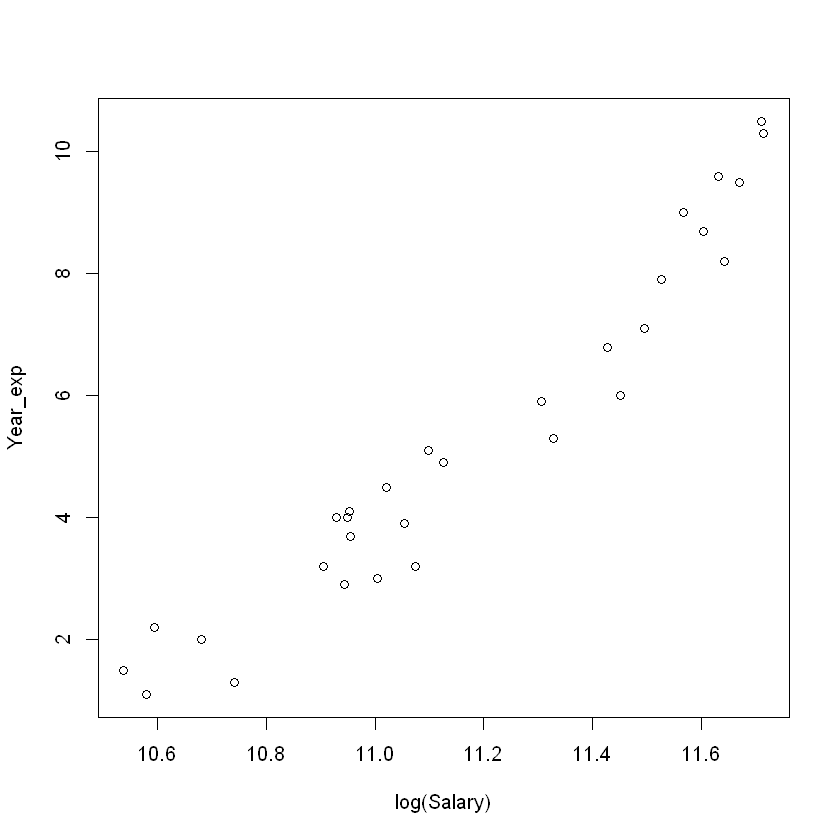

In [37]:
# Log mosal-1 # exponentioal mosal
plot( Salary,Year_exp) 
cor(Salary,Year_exp)# cor relation little bit improved 
lm_Year_exp <- lm(Salary ~ Year_exp) # log transformation
summary(lm_Year_exp) # after transformatin r square improved but not significant

qqnorm(resid(lm_Year_exp)) # checking residual value its not a linear
qqline(resid(lm_Year_exp)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Year_exp)) # still it is not fitted values
qqline(fitted.values(lm_Year_exp)) # still it is not fitted values

rmse_Year_exp <- sqrt(mean(lm_Year_exp$residuals^2))
rmse_Year_exp # rmse not imporved , residual errors is large
summary(rmse_Year_exp) # rmse need to imporved 



[1] 0.9653844


Call:
lm(formula = log(Salary) ~ Year_exp)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.18949 -0.06946 -0.01068  0.06932  0.19029 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 10.507402   0.038443  273.33   <2e-16 ***
Year_exp     0.125453   0.006406   19.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.09789 on 28 degrees of freedom
Multiple R-squared:  0.932,	Adjusted R-squared:  0.9295 
F-statistic: 383.6 on 1 and 28 DF,  p-value: < 2.2e-16


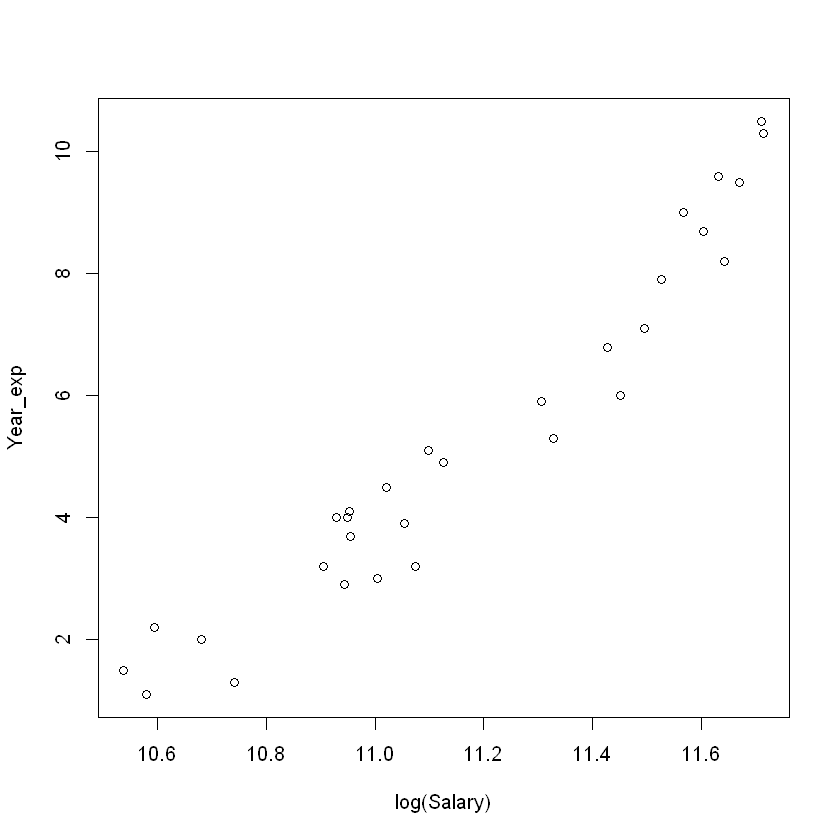

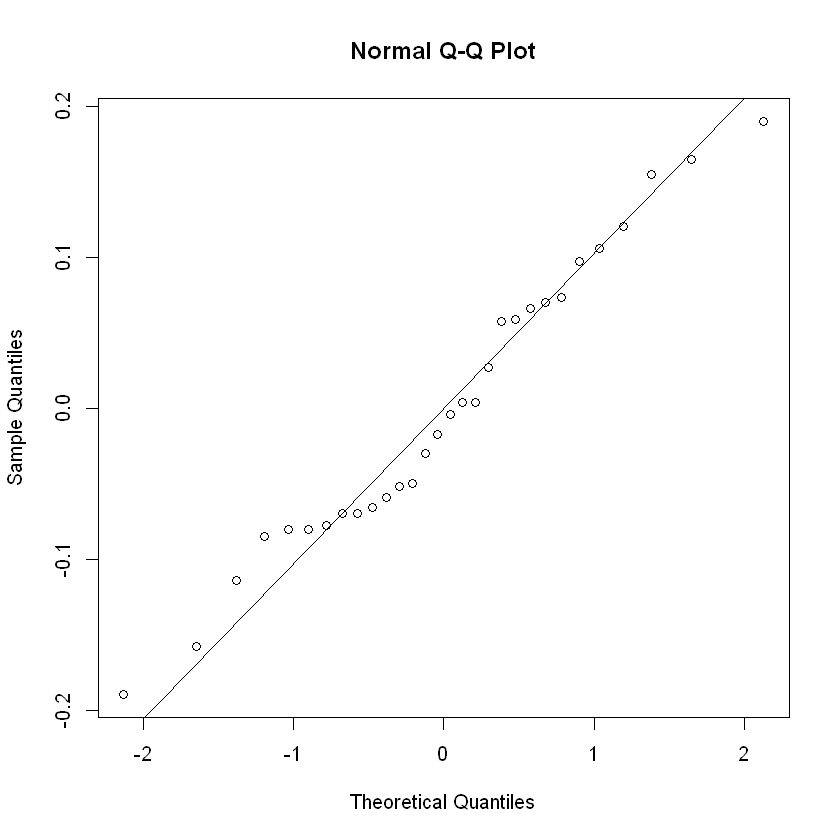

[1] 0.09457437

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.09457 0.09457 0.09457 0.09457 0.09457 0.09457 

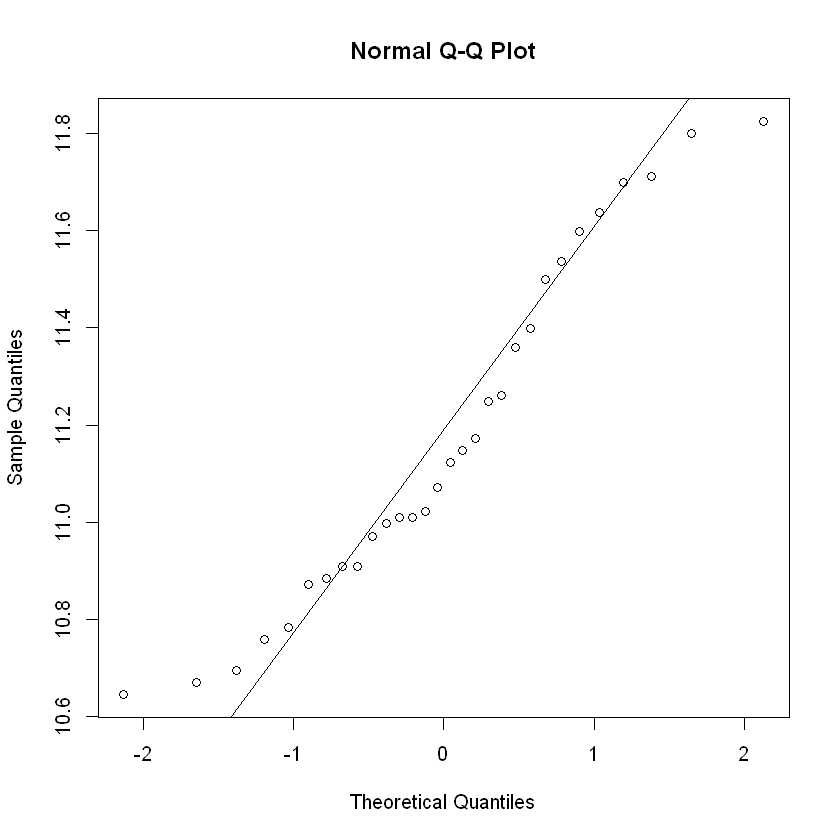

In [38]:
# log transformation  Exponential mosal 2 
# Log mosal-2 
plot(log(Salary), Year_exp) 
cor(log(Salary), Year_exp)
lm_Log_Salary <-lm(log(Salary) ~ Year_exp) # log transformation

summary(lm_Log_Salary) # after transformatin r square little bit improved but not find mosal

qqnorm(resid(lm_Log_Salary)) # checking residual value its not a linear
qqline(resid(lm_Log_Salary)) # checking residual value its not a linear
qqnorm(fitted.values(lm_Log_Salary)) # still it is not fitted values
qqline(fitted.values(lm_Log_Salary)) # still it is not fitted values

rmse_Salary <- sqrt(mean(lm_Log_Salary$residuals^2))
rmse_Salary # rmse  imporved 
summary(rmse_Salary)

[1] 0.9240611


Call:
lm(formula = Salary ~ log(Year_exp))

Residuals:
     Min       1Q   Median       3Q      Max 
-15392.6  -7523.0    559.7   6336.1  20629.8 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)      14928       5156   2.895  0.00727 ** 
log(Year_exp)    40582       3172  12.792 3.25e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 10660 on 28 degrees of freedom
Multiple R-squared:  0.8539,	Adjusted R-squared:  0.8487 
F-statistic: 163.6 on 1 and 28 DF,  p-value: 3.25e-13


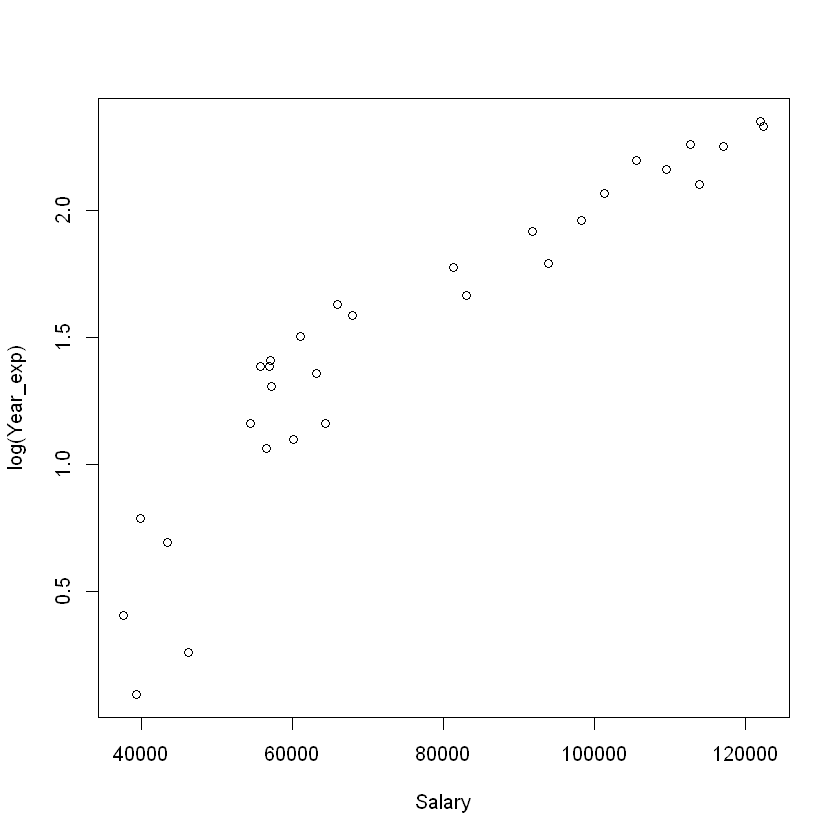

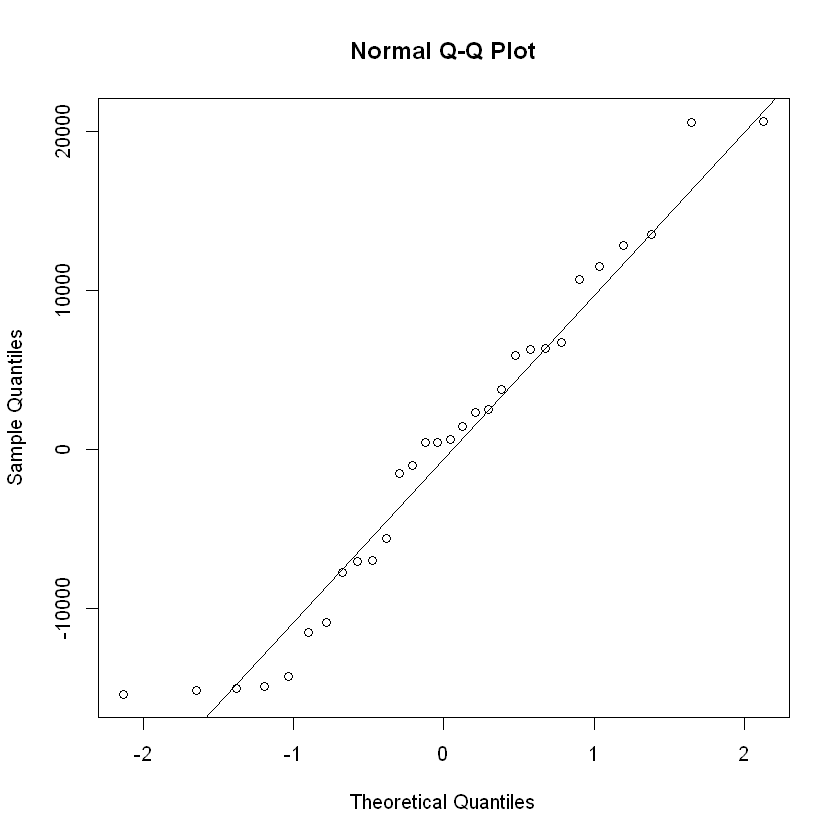

[1] 10302.89

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10303   10303   10303   10303   10303   10303 

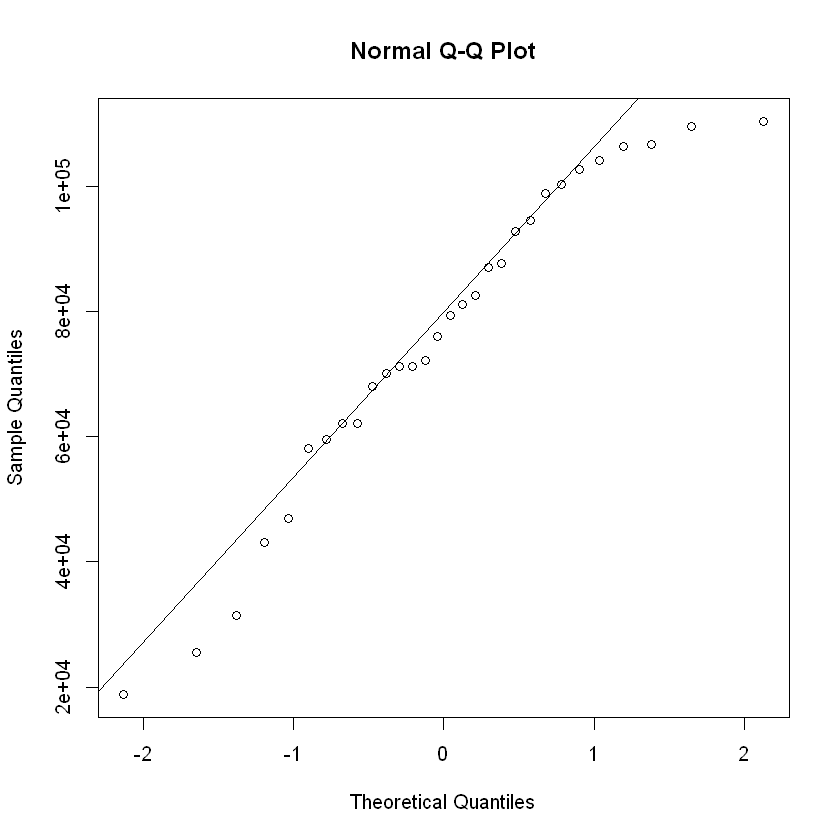

In [42]:
# Log mosal-3 # exponentioal mosal
plot( Salary,log(Year_exp)) 
cor(Salary,log(Year_exp))# cor relation little bit improved 
lm_log_Year_exp <- lm(Salary ~ log(Year_exp)) # log transformation
summary(lm_log_Year_exp) # after transformatin r square improved but not significant

qqnorm(resid(lm_log_Year_exp)) # checking residual value its not a linear
qqline(resid(lm_log_Year_exp)) # checking residual value its not a linear
qqnorm(fitted.values(lm_log_Year_exp)) # still it is not fitted values
qqline(fitted.values(lm_log_Year_exp)) # still it is not fitted values

rmse_log_Year_exp <- sqrt(mean(lm_log_Year_exp$residuals^2))
rmse_log_Year_exp # rmse not imporved , residual errors is large
summary(rmse_log_Year_exp) # rmse need to imporved 



[1] 0.9514279


Call:
lm(formula = log(Salary) ~ log(Year_exp))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17784 -0.09046  0.01958  0.06484  0.26533 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   10.32804    0.05587  184.87  < 2e-16 ***
log(Year_exp)  0.56209    0.03437   16.35  7.4e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1155 on 28 degrees of freedom
Multiple R-squared:  0.9052,	Adjusted R-squared:  0.9018 
F-statistic: 267.4 on 1 and 28 DF,  p-value: 7.395e-16


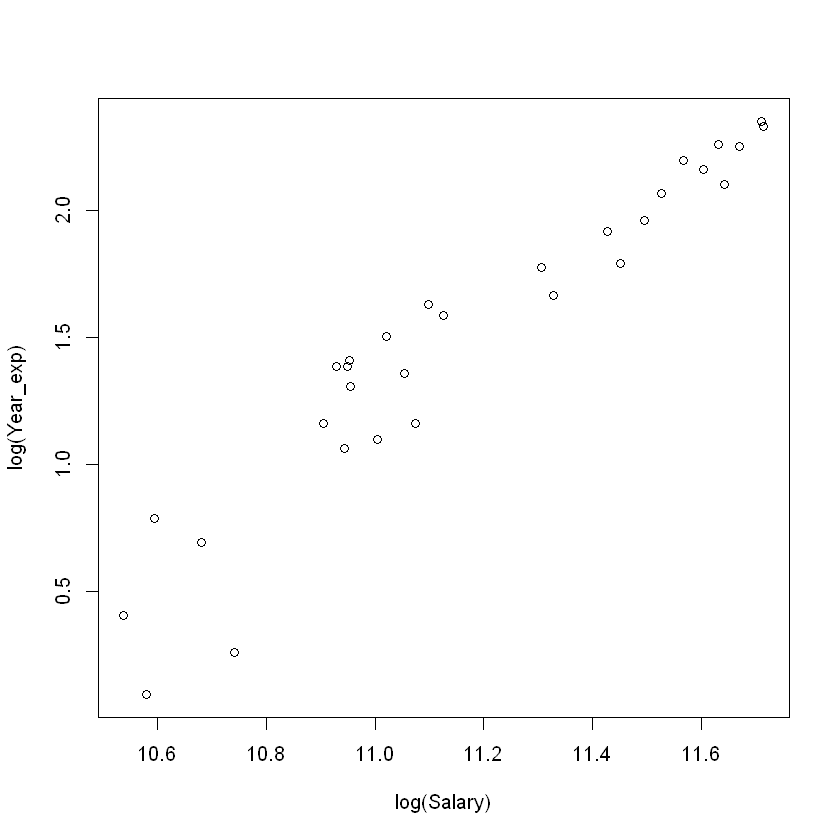

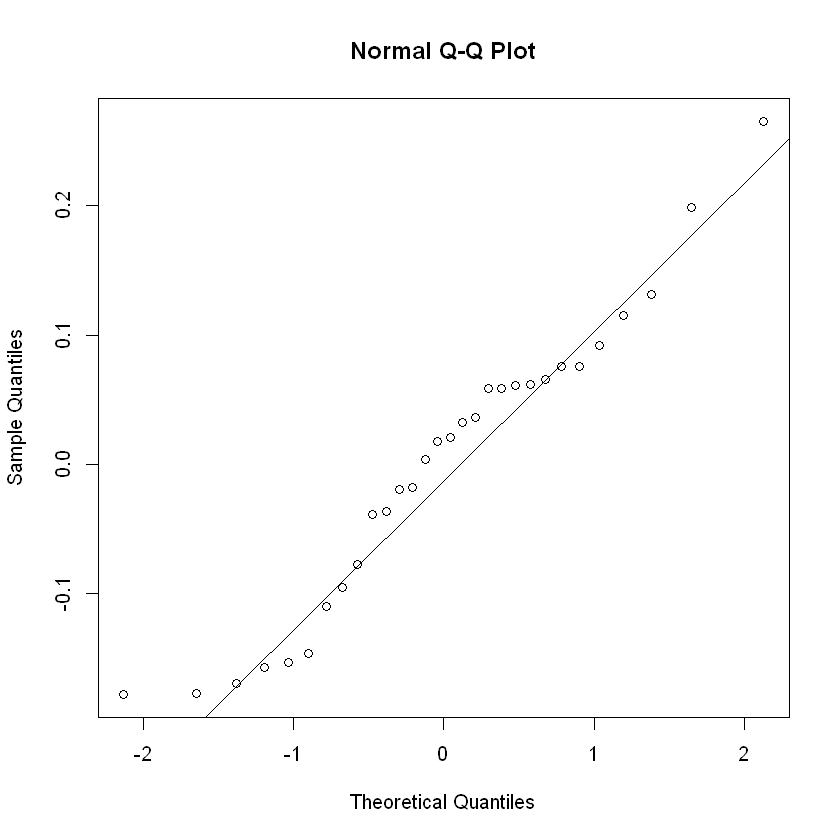

[1] 0.1116307

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1116  0.1116  0.1116  0.1116  0.1116  0.1116 

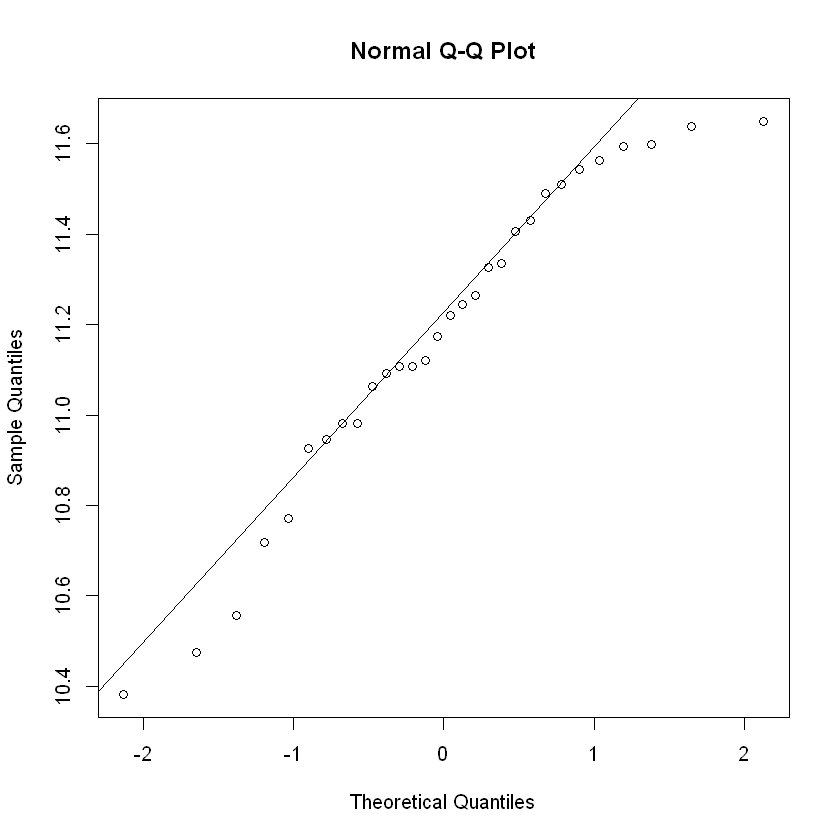

In [41]:
# Log mosal-3 # exponentioal mosal
plot( log(Salary),log(Year_exp)) 
cor(log(Salary),log(Year_exp))# cor relation little bit improved 
lm_log_mosal <- lm(log(Salary) ~ log(Year_exp)) # log transformation
summary(lm_log_mosal) # after transformatin r square improved but not significant
#confint(lm_log_mosal,level =0.95)

qqnorm(resid(lm_log_mosal)) # checking residual value its not a linear
qqline(resid(lm_log_mosal)) # checking residual value its not a linear
qqnorm(fitted.values(lm_log_mosal)) # still it is not fitted values
qqline(fitted.values(lm_log_mosal)) # still it is not fitted values

rmse_log_mosal <- sqrt(mean(lm_log_mosal$residuals^2))
rmse_log_mosal # rmse not imporved , residual errors is large
summary(rmse_log_mosal) # rmse need to imporved 

[1] 0.9211302


Call:
lm(formula = log(Salary) ~ Year_exp + I(Year_exp * Year_exp))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.156176 -0.052355 -0.000915  0.048548  0.156817 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            10.336852   0.066962 154.368  < 2e-16 ***
Year_exp                0.202382   0.026625   7.601 3.55e-08 ***
I(Year_exp * Year_exp) -0.006614   0.002236  -2.957  0.00638 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.08664 on 27 degrees of freedom
Multiple R-squared:  0.9486,	Adjusted R-squared:  0.9448 
F-statistic: 249.2 on 2 and 27 DF,  p-value: < 2.2e-16


,2.5 %,97.5 %
(Intercept),10.19945640,10.474246649
Year_exp,0.14775127,0.257011990
I(Year_exp * Year_exp),-0.01120239,-0.002024692


,fit,lwr,upr
1,38233.56,35020.89,41740.94
2,39686.67,36624.43,43004.96
3,41173.23,38260.61,44307.57
4,45033.44,42469.84,47751.79
5,46633.83,44189.17,49213.74
6,52477.43,50270.40,54781.34
7,53341.75,51139.37,55638.97
8,55091.47,52873.98,57401.95
9,55091.47,52873.98,57401.95
10,59582.92,57195.29,62070.22


,fit,lwr,upr
1,1109.4403,4322.10830,-2397.9442
2,6518.3253,9580.57073,3200.0390
3,-3442.2275,-529.61227,-6576.5675
4,-1508.4410,1055.15936,-4226.7875
5,-6742.8326,-4298.16681,-9322.7440
6,4164.5737,6371.59586,1860.6566
7,6808.2527,9010.62977,4511.0276
8,-646.4655,1571.01794,-2956.9480
9,9353.5345,11571.01794,7043.0520
10,-2393.9175,-6.28687,-4881.2204


[1] 6676.884

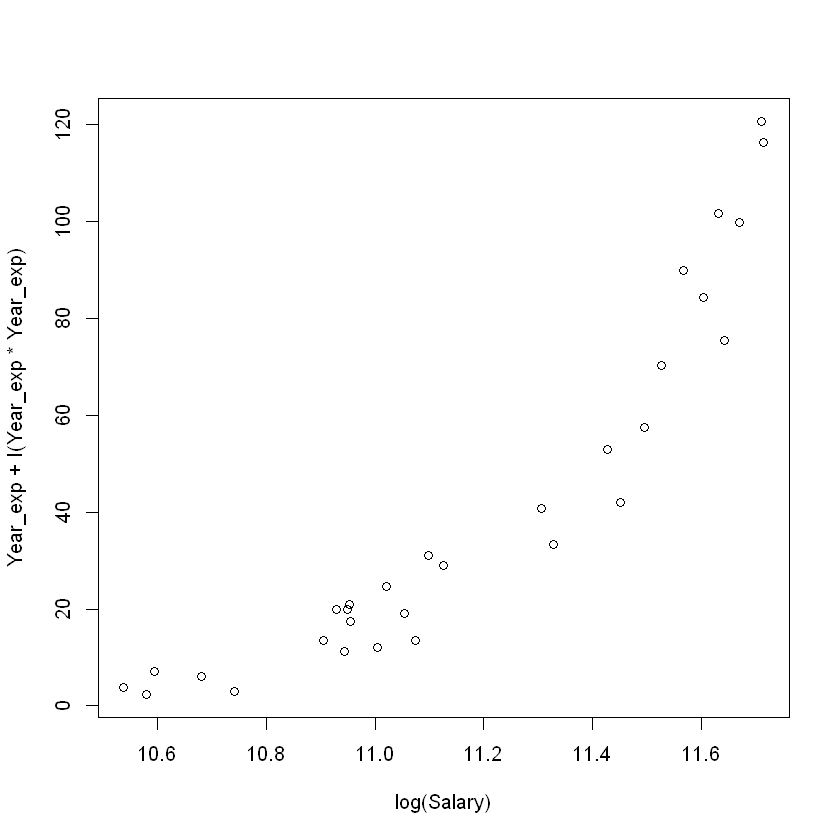

In [49]:
# Polynomial transformation 4
plot(log(Salary) , Year_exp + I(Year_exp * Year_exp))
cor(log(Salary) ,Year_exp + I(Year_exp * Year_exp)) #0.921130222058085 corelation exists
lm_3 <- lm(log(Salary) ~ Year_exp + I(Year_exp * Year_exp))
summary(lm_3)

confint(lm_3,level=0.95)# confidence interval

log_res <- predict(lm_3,interval="confidence") #predicted confidence
atpoly <- exp(log_res) # expontial values at play 
atpoly
err_poly <- Salary - atpoly  # error deducted from y
err_poly

rmse3 <- sqrt(mean(err_poly^2)) # rmse
rmse3
